In [127]:
##import all the required libraries
import numpy as np
import os
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
import matplotlib.patches as patches
import sklearn.metrics
from sklearn.metrics import mean_squared_error
from scipy import stats

In [128]:
os.chdir('C:/Users\hcgau\Downloads\AQLI Test Packet\TASK 1\TASK 1')

# Answer 1

In [129]:
Africa_data=pd.read_stata('Africa_gdp.dta')
coun_code=pd.read_excel('Africa_countries_codes.xlsx')
WB2code=pd.DataFrame(coun_code.iloc[:,2])

C:\Users\hcgau\AppData\Local\Temp\ipykernel_24440\3507585171.py:1: UnicodeWarning: 
One or more strings in the dta file could not be decoded using utf-8, and
so the fallback encoding of latin-1 is being used.  This can happen when a file
has been incorrectly encoded by Stata or some other software. You should verify
the string values returned are correct.
  Africa_data=pd.read_stata('Africa_gdp.dta')


In [130]:
Africa_data.head()

,CountryName,CountryCode,LongName,IncomeGroup,Region,year,gdp_pc_k,gdp_pc_c,va_c,va_k,emp_ratio,gdp_pwkr,pop,wkrs,va_c_pwkr,va_k_pwkr,povgap_rate_2day,pov_rate_1day,povgap_rate_1day,pov_rate_2day
0,Algeria,DZA,People's Democratic Republic of Algeria,Upper middle income,Middle East & North Africa,1986,2741.682670,2705.946030,5.808167e+10,6.270349e+10,NaN,15161.0,23539383.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Algeria,DZA,People's Democratic Republic of Algeria,Upper middle income,Middle East & North Africa,1994,2265.893267,1479.600215,3.904846e+10,6.439152e+10,33.400002,9974.0,28752749.0,9603419.0,4066.100098,6705.062500,NaN,NaN,NaN,NaN
2,Algeria,DZA,People's Democratic Republic of Algeria,Upper middle income,Middle East & North Africa,2001,2567.150874,1702.780079,5.234901e+10,8.052438e+10,31.600000,9871.0,32150198.0,10159463.0,5152.734375,7926.046387,NaN,NaN,NaN,NaN
3,Algeria,DZA,People's Democratic Republic of Algeria,Upper middle income,Middle East & North Africa,2000,2487.286034,1727.333251,5.180308e+10,7.858146e+10,30.700001,9883.0,31719449.0,9737871.0,5319.754395,8069.675781,NaN,NaN,NaN,NaN
4,Algeria,DZA,People's Democratic Republic of Algeria,Upper middle income,Middle East & North Africa,2002,2675.725212,1742.557610,5.361717e+10,8.385565e+10,32.099998,10085.0,32572977.0,10455925.0,5127.922363,8019.916504,NaN,NaN,NaN,NaN


In [131]:
Africa_data.describe()

,year,gdp_pc_k,gdp_pc_c,va_c,va_k,emp_ratio,gdp_pwkr,pop,wkrs,va_c_pwkr,va_k_pwkr,povgap_rate_2day,pov_rate_1day,povgap_rate_1day,pov_rate_2day
count,3024.000000,2435.000000,2533.000000,1.750000e+03,1.479000e+03,1144.000000,869.000000,2.968000e+03,1.144000e+03,834.000000,753.000000,169.000000,169.000000,169.000000,169.000000
mean,1986.500000,1288.336915,957.784961,2.927875e+10,3.554012e+10,62.254847,4284.886854,2.835015e+07,2.693472e+07,2168.399414,2282.146729,33.622604,45.720947,20.004142,65.016509
std,15.588362,1948.340793,1845.896200,1.022219e+11,1.014700e+11,13.691180,3907.466704,9.856821e+07,8.646778e+07,3299.236328,2990.635986,18.042544,24.927799,14.343910,24.700701
min,1960.000000,50.042206,35.367728,3.031223e+07,1.873419e+08,30.700001,576.000000,4.170000e+04,2.046363e+05,130.478134,142.902847,0.000000,0.000000,0.000000,0.000000
25%,1973.000000,371.146623,209.151638,8.800475e+08,1.505296e+09,50.675000,1657.000000,1.588222e+06,1.894647e+06,372.758118,391.656311,18.160000,24.300000,6.950000,48.300000
50%,1986.500000,570.363684,377.292922,2.910012e+09,4.608028e+09,64.269197,2838.000000,5.571095e+06,6.443312e+06,747.117432,978.203491,36.300000,51.070000,20.300000,74.840000
75%,2000.000000,1098.083243,785.070280,9.562628e+09,1.239844e+10,72.000000,4048.000000,1.375330e+07,1.341129e+07,2505.238525,2711.158936,46.650000,64.290000,29.670000,83.080000
max,2013.000000,14901.352369,24035.706090,1.164638e+12,8.007212e+11,88.099998,17538.000000,9.111262e+08,5.891836e+08,30191.310547,18292.091797,75.640000,92.550000,63.340000,98.450000


In [132]:
Africa_sorted=Africa_data.sort_values(by=['CountryName'])

In [133]:
Africa_sorted_unique=Africa_sorted.CountryName.unique()

# Answer 3

In [134]:
Africa_sorted["LongName"]=Africa_sorted["LongName"].replace(r'the','', regex=True)
Africa_sorted["LongName"]=Africa_sorted["LongName"].replace(r'of','', regex=True)

In [135]:
Africa_sorted

,CountryName,CountryCode,LongName,IncomeGroup,Region,year,gdp_pc_k,gdp_pc_c,va_c,va_k,emp_ratio,gdp_pwkr,pop,wkrs,va_c_pwkr,va_k_pwkr,povgap_rate_2day,pov_rate_1day,povgap_rate_1day,pov_rate_2day
0,Algeria,DZA,People's Democratic Republic Algeria,Upper middle income,Middle East & North Africa,1986,2741.682670,2705.946030,5.808167e+10,6.270349e+10,NaN,15161.0,23539383.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
29,Algeria,DZA,People's Democratic Republic Algeria,Upper middle income,Middle East & North Africa,1990,2544.478213,2364.549879,5.670909e+10,6.554965e+10,NaN,12262.0,26239708.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
30,Algeria,DZA,People's Democratic Republic Algeria,Upper middle income,Middle East & North Africa,1989,2589.729811,2175.093523,5.120252e+10,6.491658e+10,NaN,13100.0,25576596.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
31,Algeria,DZA,People's Democratic Republic Algeria,Upper middle income,Middle East & North Africa,1996,2358.806235,1572.831937,4.312225e+10,6.999862e+10,32.000000,9845.0,29845208.0,9550467.0,4515.197754,7329.339844,NaN,NaN,NaN,NaN
32,Algeria,DZA,People's Democratic Republic Algeria,Upper middle income,Middle East & North Africa,1981,2603.590289,2205.970102,4.089624e+10,5.050050e+10,NaN,14907.0,20103931.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2991,Zimbabwe,ZWE,Republic Zimbabwe,Low income,Sub-Saharan Africa,1994,658.338905,602.929653,6.203068e+09,6.489252e+09,70.099998,3116.0,11428655.0,8011487.0,774.271667,809.993530,NaN,NaN,NaN,NaN
2992,Zimbabwe,ZWE,Republic Zimbabwe,Low income,Sub-Saharan Africa,1982,676.475370,1084.160554,7.845057e+09,4.693218e+09,NaN,3657.0,7876786.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2993,Zimbabwe,ZWE,Republic Zimbabwe,Low income,Sub-Saharan Africa,1968,504.307281,303.563153,1.406399e+09,2.259775e+09,NaN,NaN,4874109.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2981,Zimbabwe,ZWE,Republic Zimbabwe,Low income,Sub-Saharan Africa,2010,391.550315,568.427542,6.510716e+09,4.838035e+09,82.699997,1320.0,13076978.0,10814660.0,602.026855,447.358948,NaN,NaN,NaN,NaN


# Answer 4

In [136]:
GDP_k_mean=pd.DataFrame(Africa_sorted.groupby('CountryName')['gdp_pc_k'].mean())
GDP_c_mean=pd.DataFrame(Africa_sorted.groupby('CountryName')['gdp_pc_c'].mean())
Country_code=pd.DataFrame(Africa_sorted.groupby('CountryName')['CountryCode'].unique())

In [137]:
average_gdp=pd.concat([Country_code.iloc[:,0],GDP_c_mean.iloc[:,0],GDP_k_mean.iloc[:,0]],axis=1)

In [138]:
average_gdp.to_excel('average_gdp.xlsx')

# Answer 5

In [139]:
Agri=pd.read_excel('WDI_Agricultural_VA.xls')

In [140]:
Agri=Agri.drop(columns=['Indicator Name', 'Indicator Code'])

In [141]:
Agri_long = pd.melt(Agri.iloc[:,1:-6], id_vars=['Country Code'], var_name='Year', value_name='Agri_const')

In [142]:
Agri_long['CountryCode']=Agri_long['Country Code']
Agri_long['year']=Agri_long['Year']

# Answer 6

In [143]:
Africa_merged=pd.merge(Africa_data,Agri_long,on=["CountryCode", "year"] )

In [144]:
Africa_merged.drop(columns=['CountryCode','Year'])

,CountryName,LongName,IncomeGroup,Region,year,gdp_pc_k,gdp_pc_c,va_c,va_k,emp_ratio,...,pop,wkrs,va_c_pwkr,va_k_pwkr,povgap_rate_2day,pov_rate_1day,povgap_rate_1day,pov_rate_2day,Country Code,Agri_const
0,Algeria,People's Democratic Republic of Algeria,Upper middle income,Middle East & North Africa,1986,2741.682670,2705.946030,5.808167e+10,6.270349e+10,NaN,...,23539383.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,DZA,3.290220e+09
1,Algeria,People's Democratic Republic of Algeria,Upper middle income,Middle East & North Africa,1994,2265.893267,1479.600215,3.904846e+10,6.439152e+10,33.400002,...,28752749.0,9603419.0,4066.100098,6705.062500,NaN,NaN,NaN,NaN,DZA,4.108044e+09
2,Algeria,People's Democratic Republic of Algeria,Upper middle income,Middle East & North Africa,2001,2567.150874,1702.780079,5.234901e+10,8.052438e+10,31.600000,...,32150198.0,10159463.0,5152.734375,7926.046387,NaN,NaN,NaN,NaN,DZA,6.234955e+09
3,Algeria,People's Democratic Republic of Algeria,Upper middle income,Middle East & North Africa,2000,2487.286034,1727.333251,5.180308e+10,7.858146e+10,30.700001,...,31719449.0,9737871.0,5319.754395,8069.675781,NaN,NaN,NaN,NaN,DZA,5.504267e+09
4,Algeria,People's Democratic Republic of Algeria,Upper middle income,Middle East & North Africa,2002,2675.725212,1742.557610,5.361717e+10,8.385565e+10,32.099998,...,32572977.0,10455925.0,5127.922363,8019.916504,NaN,NaN,NaN,NaN,DZA,6.160136e+09
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2963,Zimbabwe,Republic of Zimbabwe,Low income,Sub-Saharan Africa,1997,708.919770,708.094304,7.521222e+09,7.253651e+09,68.699997,...,12045813.0,8275473.0,908.856995,876.523987,NaN,NaN,NaN,NaN,ZWE,1.384484e+09
2964,Zimbabwe,Republic of Zimbabwe,Low income,Sub-Saharan Africa,1972,717.080164,480.458273,2.584584e+09,3.690722e+09,NaN,...,5573282.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,ZWE,9.073015e+08
2965,Zimbabwe,Republic of Zimbabwe,Low income,Sub-Saharan Africa,1962,496.160175,278.963760,1.074133e+09,NaN,NaN,...,4006261.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,ZWE,NaN
2966,Zimbabwe,Republic of Zimbabwe,Low income,Sub-Saharan Africa,2004,480.878143,457.384144,5.357389e+09,5.578479e+09,83.000000,...,12693047.0,10535229.0,508.521393,529.507141,NaN,NaN,NaN,NaN,ZWE,1.038861e+09


In [145]:
Africa_merged.to_csv('Africa_merged.csv')

# Answer7

In [146]:
gdp_year_k=Africa_merged.groupby('year')['gdp_pc_k'].mean()
gdp_year_c=Africa_merged.groupby('year')['gdp_pc_c'].mean()

In [147]:
Africa_gdp_timeseries=pd.concat([gdp_year_k,gdp_year_c],axis=1)

In [148]:
Africa_gdp_timeseries.to_csv('Africa_gdp_timeseries.csv')

# Answer 8

In [149]:
gdp_pc_k_country=Africa_merged.groupby('CountryName')['gdp_pc_k'].mean()
gdp_pc_c_country=Africa_merged.groupby('CountryName')['gdp_pc_c'].mean()
gdp_agri_value_country=Africa_merged.groupby('CountryName')['Agri_const'].mean()
Region_country=Africa_merged.groupby('CountryName')['Region'].unique()

In [150]:
Africa_country_average=pd.concat([Region_country,gdp_pc_k_country,gdp_pc_c_country,gdp_agri_value_country],axis=1)

In [151]:
Africa_country_average.to_csv('Africa_country_average.csv')

# 1.2 Data Exploration

# Answer 1

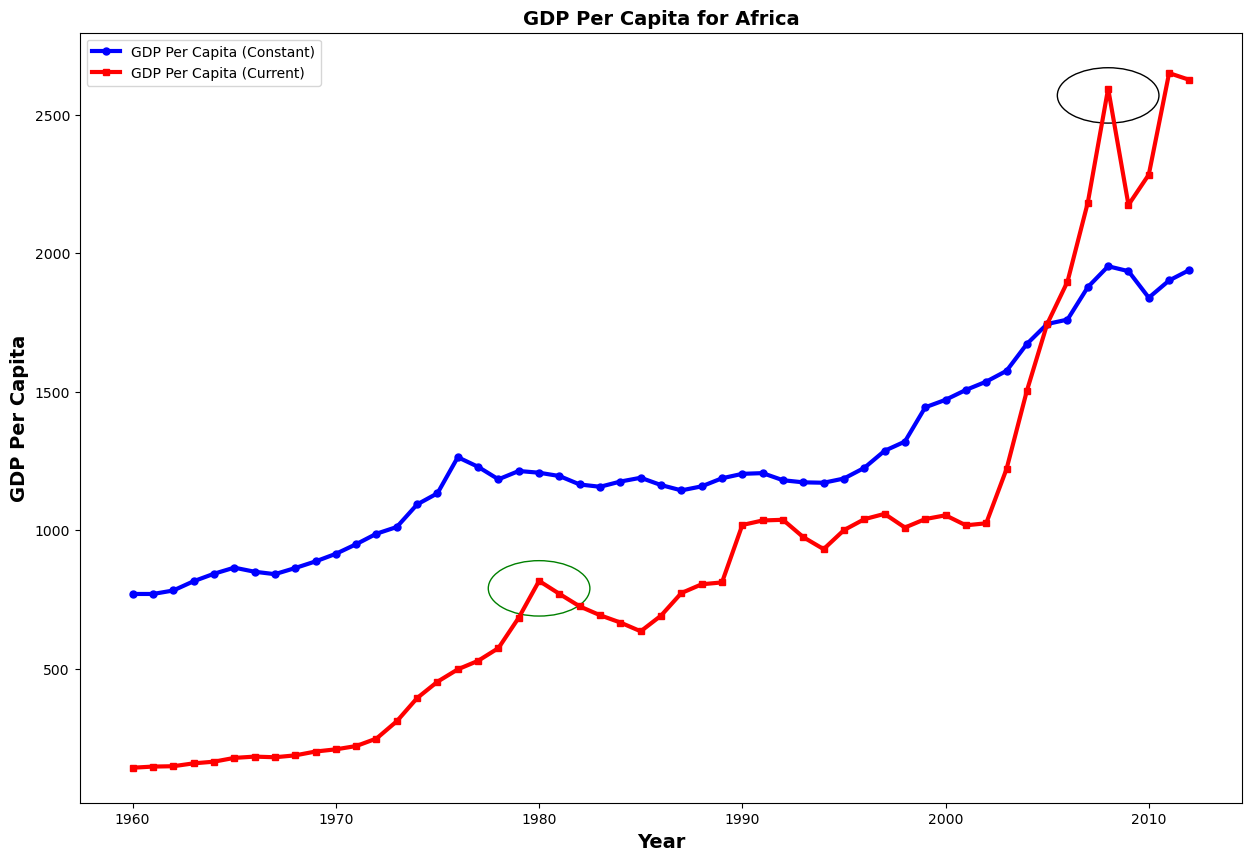

In [152]:
# creating plot of GDP Per Capita for Africa
fig, ax = plt.subplots(figsize=(15, 10))
plt.plot(Africa_gdp_timeseries['gdp_pc_k'],'b-o',label='GDP Per Capita (Constant)', linewidth=3, markersize=5)
plt.plot(Africa_gdp_timeseries['gdp_pc_c'],'r-s',label='GDP Per Capita (Current)', linewidth=3, markersize=5)
Ellipse1=patches.Ellipse((1980,790), width=200, height=5, angle=90, color='g', fill=False)
Ellipse2=patches.Ellipse((2008,2570), width=200, height=5, angle=90, color='k', fill=False)
ax = plt.gca()
ax.add_patch(Ellipse1)
ax.add_patch(Ellipse2)
plt.xlabel("Year", weight="bold", fontsize=14) 
plt.ylabel("GDP Per Capita", weight="bold", fontsize=14) 
plt.title("GDP Per Capita for Africa", weight="bold", fontsize=14) 
plt.legend() 
plt.show()
fig.savefig('Africa_gdp_timeseries.pdf', dpi=300)

# Answer 2

In [153]:
# creating data for plot of Middle East & North Africa
Africa_MENA=Africa_country_average.loc[Africa_country_average['Region']=='Middle East & North Africa']

In [154]:
Africa_MENA

,Region,gdp_pc_k,gdp_pc_c,Agri_const
CountryName,,,,
Algeria,[Middle East & North Africa],2398.365120,1798.275839,4.123985e+09
Djibouti,[Middle East & North Africa],949.390067,795.319032,1.991170e+07
"Egypt, Arab Rep.",[Middle East & North Africa],815.219107,853.258377,8.322694e+09
Libya,[Middle East & North Africa],7552.849995,7304.753521,1.151481e+09
Morocco,[Middle East & North Africa],1403.178042,1032.686207,6.057808e+09
Tunisia,[Middle East & North Africa],2072.812233,1639.948023,1.917665e+09


C:\Users\hcgau\AppData\Local\Temp\ipykernel_24440\2727350496.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  Africa_MENA['CountryName']=Africa_MENA.index


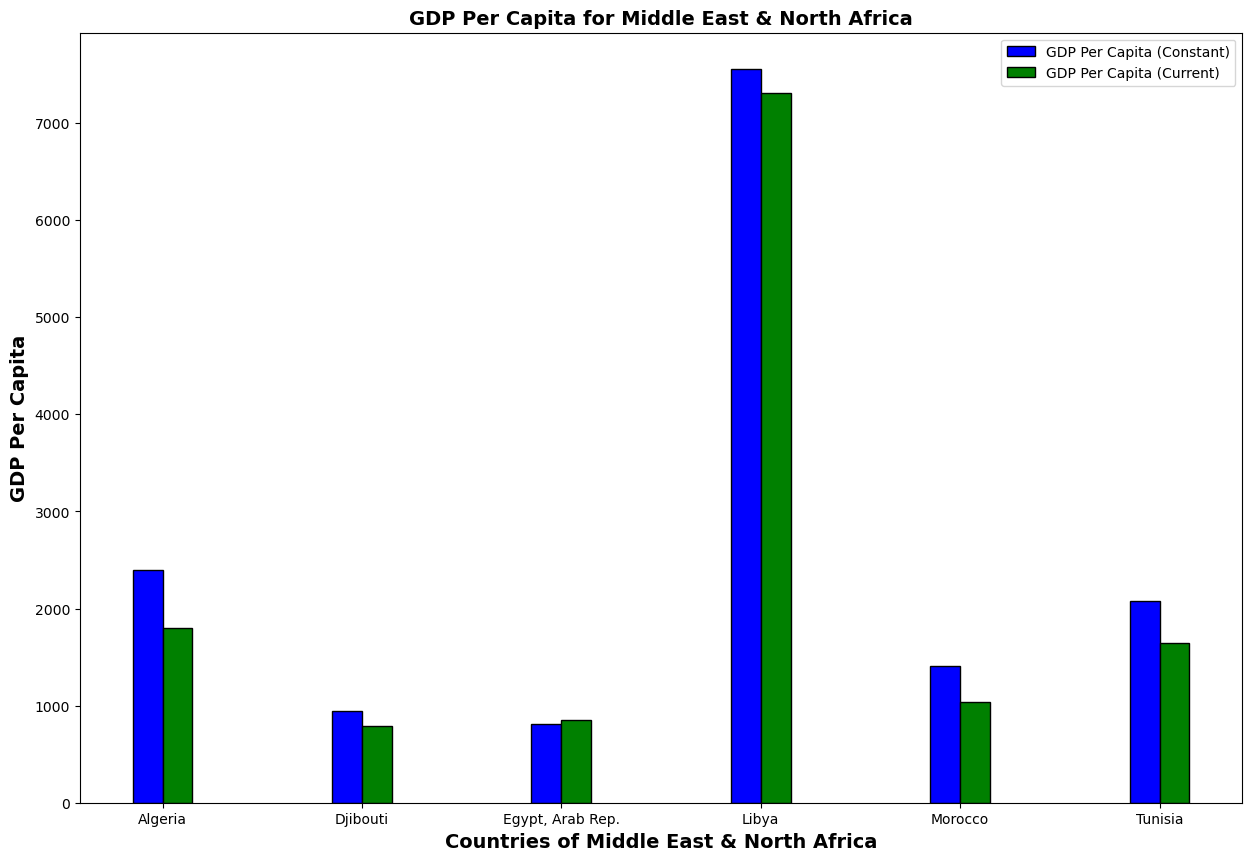

In [155]:
#Creating bar plot of GDP Per Capita for Middle East & North Africa
Africa_MENA['CountryName']=Africa_MENA.index
fig, ax = plt.subplots(figsize=(15, 10))
n=6
r = np.arange(n) 
width = 0.15

plt.bar(r, Africa_MENA['gdp_pc_k'], color = 'b', 
        width = width, edgecolor = 'black', 
        label='GDP Per Capita (Constant)') 
plt.bar(r + width, Africa_MENA['gdp_pc_c'], color = 'g', 
        width = width, edgecolor = 'black', 
        label='GDP Per Capita (Current)') 
  
plt.xlabel("Countries of Middle East & North Africa", weight="bold", fontsize=14) 
plt.ylabel("GDP Per Capita", weight="bold", fontsize=14) 
plt.title("GDP Per Capita for Middle East & North Africa", weight="bold", fontsize=14) 

plt.xticks(r + width/2,['Algeria', 'Djibouti', 'Egypt, Arab Rep.', 'Libya', 'Morocco',
       'Tunisia']) 
plt.legend() 
plt.show() 
fig.savefig('GDP Per Capita for Middle East & North Africa.pdf', dpi=300)

# Answer 3

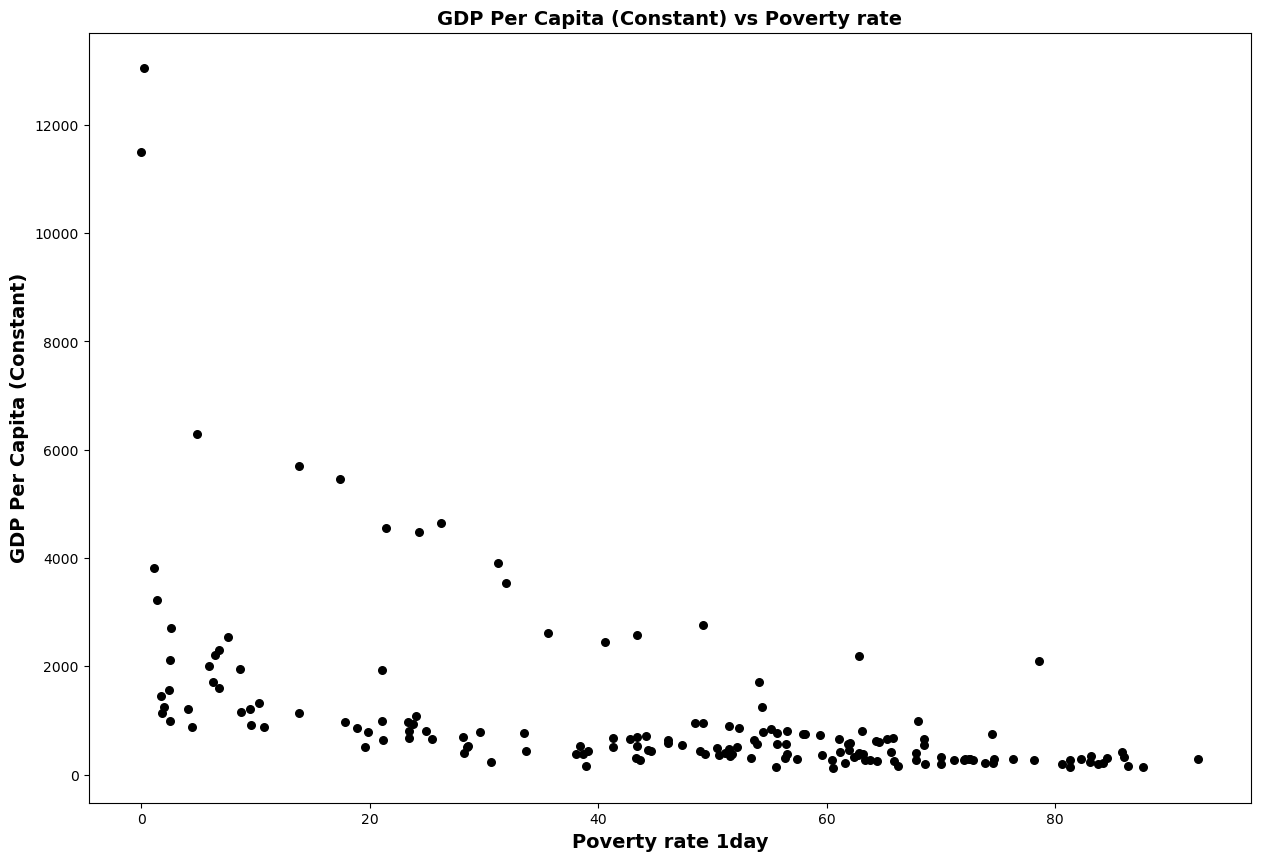

In [156]:
# Scatter plot of GDP Per Capita (Constant) vs Poverty rate
fig, ax = plt.subplots(figsize=(15, 10))
plt.scatter(Africa_merged['pov_rate_1day'],Africa_merged['gdp_pc_k'], color='black', s=30)
plt.xlabel("Poverty rate 1day", weight="bold", fontsize=14) 
plt.ylabel("GDP Per Capita (Constant)", weight="bold", fontsize=14) 
plt.title("GDP Per Capita (Constant) vs Poverty rate", weight="bold", fontsize=14) 
plt.show() 
fig.savefig('GDP Per Capita (Constant) vs Poverty rate.pdf', dpi=300)

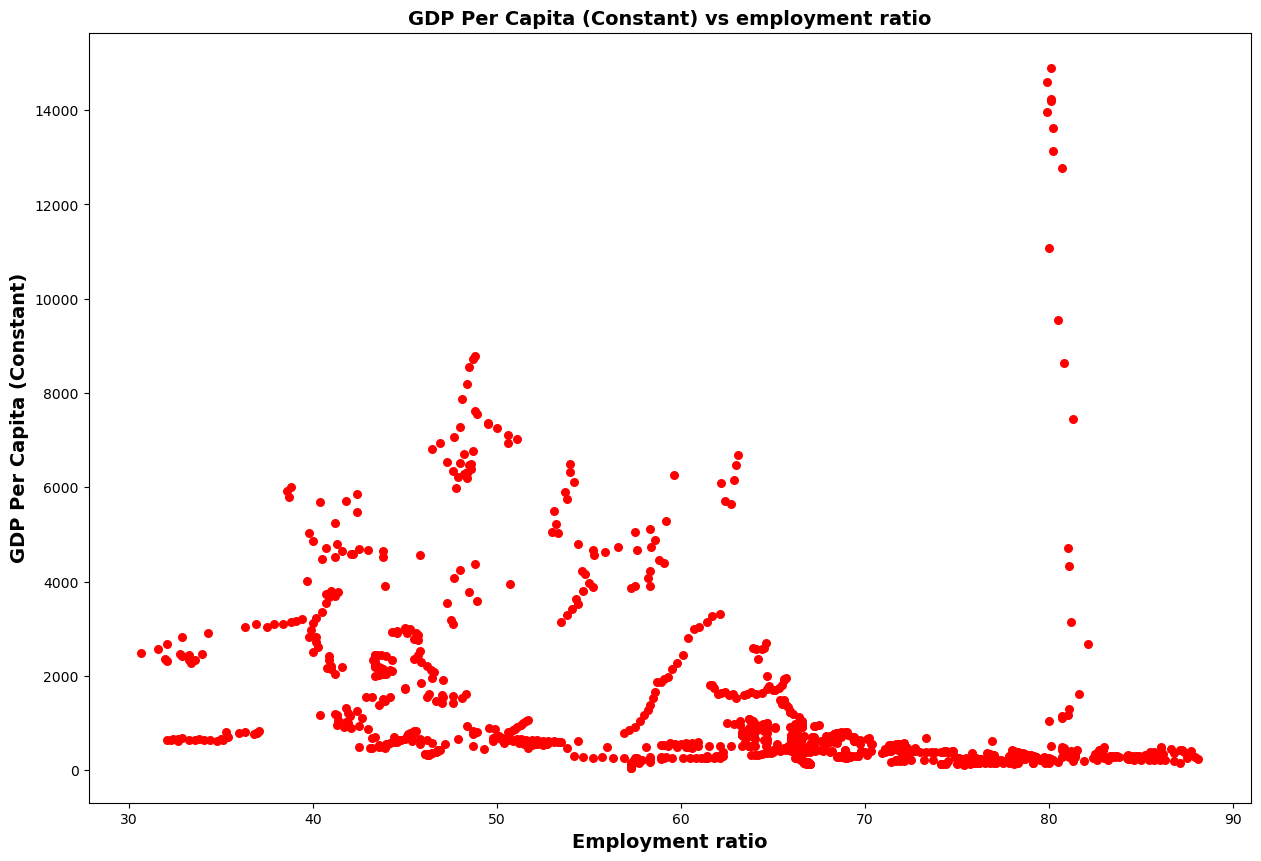

In [157]:
# Scatter plot ofGDP Per Capita (Constant) vs employmnent ratio
fig, ax = plt.subplots(figsize=(15, 10))
plt.scatter(Africa_merged['emp_ratio'],Africa_merged['gdp_pc_k'], color='red', s=30)
plt.xlabel("Employment ratio", weight="bold", fontsize=14) 
plt.ylabel("GDP Per Capita (Constant)", weight="bold", fontsize=14) 
plt.title("GDP Per Capita (Constant) vs employment ratio", weight="bold", fontsize=14) 
plt.show() 
fig.savefig('GDP Per Capita (Constant) vs employment ratio.pdf', dpi=300)

# 1.3 Estimation and Causal Inference
# Answer1

In [158]:
# creating input data for linear regression model
Africa_merged_na_removed=Africa_merged.dropna()
reg_var=pd.DataFrame([Africa_merged['gdp_pc_k'],Africa_merged['pov_rate_1day']])
reg_var=reg_var.transpose()
reg_var=reg_var.dropna()

In [159]:
#running linear regression model
X=reg_var[['gdp_pc_k']]
y=reg_var['pov_rate_1day']
model=LinearRegression().fit(X,y)

In [160]:
##coefficients and main statistics of thre fitted linear regression model


print("Coefficients:", model.coef_)
print("Intercept:", model.intercept_)

# R-squared and Adjusted R-squared
r_squared = model.score(X, y)
adj_r_squared = 1 - (1 - r_squared) * (len(y) - 1) / (len(y) - X.shape[1] - 1)
print("R-squared:", r_squared)
print("Adjusted R-squared:", adj_r_squared)

# MSE and RMSE
mse = mean_squared_error(y, model.predict(X))
rmse = np.sqrt(mse)
print("Mean Squared Error:", mse)
print("Root Mean Squared Error:", rmse)

# t-statistics and p-values for coefficients
params = np.append(model.intercept_, model.coef_)
newX = np.append(np.ones((len(X), 1)), X, axis=1)
MSE = (sum((y - model.predict(X))**2)) / (len(newX) - len(newX[0]))

var_b = MSE * (np.linalg.inv(np.dot(newX.T, newX)).diagonal())
sd_b = np.sqrt(var_b)
ts_b = params / sd_b

p_values =[2 * (1 - stats.t.cdf(np.abs(i), (len(newX) - 1))) for i in ts_b]

pd.DataFrame(np.column_stack([params, sd_b, ts_b, p_values]), columns=['Coefficient', 'Standard Error', 't value', 'p value'])

# F-statistic
f_statistic = (r_squared / (1 - r_squared)) * ((len(y) - X.shape[1] - 1) / X.shape[1])
print("F-statistic:", f_statistic)

# Residuals
residuals = y - model.predict(X)

df = pd.DataFrame({
'Coefficients': model.coef_,
'Intercept': model.intercept_,
'R-squared': r_squared,
'Adjusted R-squared': adj_r_squared,
'Mean Squared Error': mse,
'Root Mean Squared Error': rmse,
'F-statistic': f_statistic})
result_reg=df.transpose()
result_reg.to_csv('Poverty_Regression.csv')

Coefficients: [-0.00756719]
Intercept: 54.01516575628363
R-squared: 0.2509777305696883
Adjusted R-squared: 0.24649256727968638
Mean Squared Error: 462.6847556151385
Root Mean Squared Error: 21.51010821951248
F-statistic: 55.957322920473615


# Answer 4

In [161]:
Africa_merged_na_removed['IncomeGroup'].unique()

array(['Upper middle income', 'Low income', 'Lower middle income', ''],
      dtype=object)

In [162]:
reg_input=Africa_merged_na_removed[['emp_ratio','gdp_pc_k','IncomeGroup','wkrs']]
reg_input

,emp_ratio,gdp_pc_k,IncomeGroup,wkrs
16,32.099998,2306.850214,Upper middle income,9410263.0
238,81.000000,380.103442,Low income,10253860.0
240,81.199997,277.018142,Low income,7971067.5
241,81.300003,331.973688,Low income,8916851.0
262,80.800003,436.093057,Low income,12196734.0
...,...,...,...,...
2888,67.699997,593.436866,Lower middle income,7375589.0
2892,67.699997,582.989871,Lower middle income,6142631.5
2899,67.300003,647.361695,Lower middle income,7929025.0
2901,64.000000,661.298394,Lower middle income,5390757.0


In [163]:

unique_strings =reg_input['IncomeGroup'].unique()
string_to_int_map = {string: i+1 for i, string in enumerate(unique_strings)}

# Apply the mapping
reg_input['IncGrp'] = reg_input['IncomeGroup'].map(string_to_int_map)

C:\Users\hcgau\AppData\Local\Temp\ipykernel_24440\947973540.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  reg_input['IncGrp'] = reg_input['IncomeGroup'].map(string_to_int_map)


In [164]:
reg_input.dropna()

,emp_ratio,gdp_pc_k,IncomeGroup,wkrs,IncGrp
16,32.099998,2306.850214,Upper middle income,9410263.0,1
238,81.000000,380.103442,Low income,10253860.0,2
240,81.199997,277.018142,Low income,7971067.5,2
241,81.300003,331.973688,Low income,8916851.0,2
262,80.800003,436.093057,Low income,12196734.0,2
...,...,...,...,...,...
2888,67.699997,593.436866,Lower middle income,7375589.0,3
2892,67.699997,582.989871,Lower middle income,6142631.5,3
2899,67.300003,647.361695,Lower middle income,7929025.0,3
2901,64.000000,661.298394,Lower middle income,5390757.0,3


In [165]:
dummy_variables = pd.get_dummies(reg_input['IncGrp'], prefix='IncGrp', drop_first=True)

reg_input = pd.concat([reg_input, dummy_variables], axis=1)
reg_input

,emp_ratio,gdp_pc_k,IncomeGroup,wkrs,IncGrp,IncGrp_2,IncGrp_3,IncGrp_4
16,32.099998,2306.850214,Upper middle income,9410263.0,1,False,False,False
238,81.000000,380.103442,Low income,10253860.0,2,True,False,False
240,81.199997,277.018142,Low income,7971067.5,2,True,False,False
241,81.300003,331.973688,Low income,8916851.0,2,True,False,False
262,80.800003,436.093057,Low income,12196734.0,2,True,False,False
...,...,...,...,...,...,...,...,...
2888,67.699997,593.436866,Lower middle income,7375589.0,3,False,True,False
2892,67.699997,582.989871,Lower middle income,6142631.5,3,False,True,False
2899,67.300003,647.361695,Lower middle income,7929025.0,3,False,True,False
2901,64.000000,661.298394,Lower middle income,5390757.0,3,False,True,False


In [166]:
reg_input['IncGrp_2'] = reg_input['IncGrp_2'].replace({True: 1, False: 0})
reg_input['IncGrp_3'] = reg_input['IncGrp_3'].replace({True: 1, False: 0})
reg_input['IncGrp_4'] = reg_input['IncGrp_4'].replace({True: 1, False: 0})
reg_input

,emp_ratio,gdp_pc_k,IncomeGroup,wkrs,IncGrp,IncGrp_2,IncGrp_3,IncGrp_4
16,32.099998,2306.850214,Upper middle income,9410263.0,1,0,0,0
238,81.000000,380.103442,Low income,10253860.0,2,1,0,0
240,81.199997,277.018142,Low income,7971067.5,2,1,0,0
241,81.300003,331.973688,Low income,8916851.0,2,1,0,0
262,80.800003,436.093057,Low income,12196734.0,2,1,0,0
...,...,...,...,...,...,...,...,...
2888,67.699997,593.436866,Lower middle income,7375589.0,3,0,1,0
2892,67.699997,582.989871,Lower middle income,6142631.5,3,0,1,0
2899,67.300003,647.361695,Lower middle income,7929025.0,3,0,1,0
2901,64.000000,661.298394,Lower middle income,5390757.0,3,0,1,0


In [173]:
X = reg_input[['IncGrp_2','IncGrp_3','IncGrp_4']]
Y = reg_input['emp_ratio']
model= LinearRegression()
model.fit(X, Y)

LinearRegression()

In [174]:
print("Coefficients:", model.coef_)
print("Intercept:", model.intercept_)


# MSE and RMSE
mse = mean_squared_error(y, model.predict(X))
rmse = np.sqrt(mse)
print("Mean Squared Error:", mse)
print("Root Mean Squared Error:", rmse)


# F-statistic
f_statistic = (r_squared / (1 - r_squared)) * ((len(y) - X.shape[1] - 1) / X.shape[1])
print("F-statistic:", f_statistic)

# Residuals
residuals = y - model.predict(X)

Coefficients: [34.6833335  16.67471277 23.37191898]
Intercept: 40.466666751437735
Mean Squared Error: 2253734.4218301633
Root Mean Squared Error: 1501.244291189866
F-statistic: 1141.1380255747429


In [175]:
reg_input['Low_Income']=reg_input['IncGrp_2']*reg_input['gdp_pc_k']
reg_input['Low_mid_Income']=reg_input['IncGrp_3']*reg_input['gdp_pc_k']
reg_input['Up_mid_Income']=reg_input['IncGrp_4']*reg_input['gdp_pc_k']
reg_input

,emp_ratio,gdp_pc_k,IncomeGroup,wkrs,IncGrp,IncGrp_2,IncGrp_3,IncGrp_4,Low_Income,Low_mid_Income,Up_mid_Income,Interaction_Low_GDP,Interaction_Low_mid_GDP,Interaction_Up_mid_GDP
16,32.099998,2306.850214,Upper middle income,9410263.0,1,0,0,0,0.000000,0.000000,0.0,0.000000,0.000000,0.0
238,81.000000,380.103442,Low income,10253860.0,2,1,0,0,380.103442,0.000000,0.0,380.103442,0.000000,0.0
240,81.199997,277.018142,Low income,7971067.5,2,1,0,0,277.018142,0.000000,0.0,277.018142,0.000000,0.0
241,81.300003,331.973688,Low income,8916851.0,2,1,0,0,331.973688,0.000000,0.0,331.973688,0.000000,0.0
262,80.800003,436.093057,Low income,12196734.0,2,1,0,0,436.093057,0.000000,0.0,436.093057,0.000000,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2888,67.699997,593.436866,Lower middle income,7375589.0,3,0,1,0,0.000000,593.436866,0.0,0.000000,593.436866,0.0
2892,67.699997,582.989871,Lower middle income,6142631.5,3,0,1,0,0.000000,582.989871,0.0,0.000000,582.989871,0.0
2899,67.300003,647.361695,Lower middle income,7929025.0,3,0,1,0,0.000000,647.361695,0.0,0.000000,647.361695,0.0
2901,64.000000,661.298394,Lower middle income,5390757.0,3,0,1,0,0.000000,661.298394,0.0,0.000000,661.298394,0.0


In [176]:
import statsmodels.api as sm
import pandas as pd
reg_input['IncGrp_2'] = reg_input['IncGrp_2'].astype(int)
reg_input['IncGrp_3'] = reg_input['IncGrp_3'].astype(int)
reg_input['IncGrp_4'] = reg_input['IncGrp_4'].astype(int)
reg_input['Interaction_Low_GDP']=reg_input['IncGrp_2']*reg_input['gdp_pc_k']
reg_input['Interaction_Low_mid_GDP']=reg_input['IncGrp_3']*reg_input['gdp_pc_k']
reg_input['Interaction_Up_mid_GDP']=reg_input['IncGrp_4']*reg_input['gdp_pc_k']
# Assuming df is your DataFrame with the necessary columns
X = reg_input[['IncGrp_2','IncGrp_3', 'IncGrp_4', 'gdp_pc_k', 'Interaction_Low_GDP', 'Interaction_Low_mid_GDP','Interaction_Up_mid_GDP']]
y = reg_input['emp_ratio']

# Adding a constant to the model (for the intercept)
X = sm.add_constant(X)

# Fit the OLS model
model = sm.OLS(y, X).fit()

# Print the summary
print(model.summary())


                            OLS Regression Results                            
Dep. Variable:              emp_ratio   R-squared:                       0.713
Model:                            OLS   Adj. R-squared:                  0.686
Method:                 Least Squares   F-statistic:                     25.94
Date:                Thu, 14 Dec 2023   Prob (F-statistic):           1.90e-17
Time:                        09:42:12   Log-Likelihood:                -283.61
No. Observations:                  81   AIC:                             583.2
Df Residuals:                      73   BIC:                             602.4
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
                              coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------
const                     

# Answer 5

In [177]:
#input variable for fixed effects model
new_var=Africa_merged_na_removed[['CountryName','gdp_pc_k','year','emp_ratio']]
#Linear fixed effect variable
new_var = pd.get_dummies(new_var, columns=['CountryName'], drop_first=True)

# Defining the independent variables and the dependent variable
X = new_var.drop(['gdp_pc_k', 'year'], axis=1)
y = new_var['gdp_pc_k']

# Fitting the linear regression model
model = LinearRegression()
model.fit(X, y)


LinearRegression()

In [178]:
##coefficients and main statistics of thre fitted fixed effects model

print("Coefficients:", model.coef_)
print("Intercept:", model.intercept_)

# R-squared and Adjusted R-squared
r_squared = model.score(X, y)
adj_r_squared = 1 - (1 - r_squared) * (len(y) - 1) / (len(y) - X.shape[1] - 1)
print("R-squared:", r_squared)
print("Adjusted R-squared:", adj_r_squared)

# MSE and RMSE
mse = mean_squared_error(y, model.predict(X))
rmse = np.sqrt(mse)
print("Mean Squared Error:", mse)
print("Root Mean Squared Error:", rmse)


# F-statistic
f_statistic = (r_squared / (1 - r_squared)) * ((len(y) - X.shape[1] - 1) / X.shape[1])
print("F-statistic:", f_statistic)

# Residuals
residuals = y - model.predict(X)

df_2 = pd.DataFrame({
'Coefficients': model.coef_,
'Intercept': model.intercept_,
'R-squared': r_squared,
'Adjusted R-squared': adj_r_squared,
'Mean Squared Error': mse,
'Root Mean Squared Error': rmse,
'F-statistic': f_statistic})
result_reg=df_2.transpose()
result_reg.to_csv('Fixed_effect_Regression.csv')

Coefficients: [   -9.94964627 -1463.26918245 -1150.38260925 -1825.0192183
 -1060.42974036 -1693.43326274 -1479.43984481 -1507.24709759
 -1663.9827591  -1743.90944664  -419.85325814 -1569.39144928
 -1386.18549718 -1228.05382959  2762.77638791 -1171.74205381
 -1394.36265126 -1438.10489999   488.18966684 -1559.60541974
 -1324.42953391]
Intercept: 2626.2338437213875
R-squared: 0.97800260246009
Adjusted R-squared: 0.9701730202848677
Mean Squared Error: 30891.05350217057
Root Mean Squared Error: 175.75850904627796
F-statistic: 124.911212446957
